<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> <h1>Tarea Semanal 12: Sintesis doblemente cargada</h1></center>
<h3> Teoría de circuitos 2 </h3>
<h3> 2do Cuatrimestre 2023 </h3>    
<h3> Facundo N. Iglesias </h3>    
</div>

<div class="alert alert-success text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>INDICE</h1></center>
    
</div>

0. [Librerias](#lib)

1. [Obtención de impedancia Z1](#1)

2. [Sintesis del cuadripolo](#2)
    
3. [Simulación de S21 y S11](#3)

4. [Comportamiento del circuito](#4)

5. [Desnormalización en frecuencia e impedancia](#5)
    

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="lib">
        <h1> LIBRERIAS</h1>
    </a> 
</center>
</div>

In [90]:
#Numeric
import numpy as np
from numpy import sqrt
#Simbolic
import sympy as sp
from sympy.abc import s
from sympy.parsing.sympy_parser import parse_expr
from sympy.solvers import solve
#Visual & graphs
from IPython.display import IFrame, display, Math
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import IFrame, display, Math
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
from sympy import N
#Simulation
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys,  tf2sos_analog
from pytc2.sistemas_lineales import plot_plantilla, group_delay
import scipy.io as sio
import warnings
warnings.filterwarnings('ignore')
#Sintesis
from pytc2.sintesis_dipolo import foster, cauer_LC
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion, dibujar_cauer_LC
from pytc2.general import print_latex
from pytc2.remociones import remover_valor, remover_polo_sigma, remover_valor_en_infinito, remover_polo_infinito, remover_polo_dc 
from pytc2.remociones import remover_polo_jw,remover_valor_en_dc
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor,dibujar_tanque_RC_derivacion, dibujar_elemento_derivacion
from pytc2.dibujar import Capacitor, Inductor, dibujar_elemento_derivacion, dibujar_tanque_derivacion, dibujar_tanque_RC_serie, dibujar_puerto_salida
from pytc2.remociones import remover_polo_infinito, modsq2mod_s


Diseñar un filtro con las siguientes caracteristicas:

* Pasa bajos
* Bessel (Retardo Cte.)
* Orden 3
* No disipativo
* Que respete la siguiente topología:

<img src="./rsc/consigna1.png" align="center" width="443" height="184" /> 

<a name="1">
   <h3> 1) Impedancia de entrada al cuadripolo A cargado con un resistor de 1 Ohm a la salida</h3>
</a>

En primer lugar planteamos la transferencia de tensión de un filtro Bessell de tercer orden:

\begin{equation}
H(s)|_{B_{n=3}} = \frac{15}{s³+6s²+15s+15}
\end{equation}

En redes no disipativas se cumple:

\begin{equation}
|s_{11}|²+|s_{21}|² = 1
\end{equation}

Calculamos los parámetros s por definición:

La transferencia directa de potencia se calcula como:

\begin{equation}
s_{21} = \frac{b_2}{a_1}|_{a_2=0} = 2\frac{V_2}{V_{g1}}\sqrt{\frac{R_{01}}{R_{02}}} = 2\frac{V_2}{V_{g1}}
\end{equation}

como la salida está adaptada:

\begin{equation}
V_g = 2 V_1 
\end{equation}

entonces:

\begin{equation}
s_{21} = \frac{V_2}{V_1} = \frac{15}{s³+6s²+15s+15}
\end{equation}





Utilizando la herramienta de calculo simbólico "sympy" calculamos S11.

Por propiedad del modulo de la transferencia se cumple que:

\begin{equation}
|s_{21}|²= s_{21}(s) * s_{21}(-s) 
\end{equation}

In [38]:
s21  = 15/(s**3+6*s**2+15*s+15)
display(s21)
_s21 = s21.subs(s,-s)
display(_s21)

15/(s**3 + 6*s**2 + 15*s + 15)

15/(-s**3 + 6*s**2 - 15*s + 15)

Utilizando la condición de redes no disipativas calculamos el modulo del coeficiente de reflexión s11:

\begin{equation}
|s_{11}|²=1-|s_{21}|² 
\end{equation}

In [39]:
s11_2 = sp.factor( 1- (s21 * _s21) )
display(s11_2)

s**2*(s**4 - 6*s**2 + 45)/((s**3 - 6*s**2 + 15*s - 15)*(s**3 + 6*s**2 + 15*s + 15))

A partir de su modulo obtenemos el parámetros:

In [45]:
s11 = modsq2mod_s(s11_2)
s11

s*(s**2 + 2*sqrt(3)*5**(1/4)*s*cos(atan(2)/2) + 3*sqrt(5))/(s**3 + 6*s**2 + 15*s + 15)

Empleando la siguiente expresión:

\begin{equation}
Z_1 = \frac{1+s_{11}}{1-s_{11}}
\end{equation}

obtenemos la impedancia que se ve desde el plano 1 con el puerto 2 adaptado (a2=0)

In [59]:
z1 = sp.simplify(sp.expand(sp.simplify(sp.expand(1+s11))/sp.simplify(sp.expand((1-s11)))))
z1

(2*s**3 + 2*sqrt(3)*5**(1/4)*s**2*cos(atan(2)/2) + 6*s**2 + 3*sqrt(5)*s + 15*s + 15)/(-2*sqrt(3)*5**(1/4)*s**2*cos(atan(2)/2) + 6*s**2 - 3*sqrt(5)*s + 15*s + 15)

<a name="2">
   <h3> 2) Sintesis como cuadripolo escalera</h3>
</a>

Analizamos los valores en los extremos:

In [56]:
sp.limit(z1,s,'oo')

oo

In [57]:
sp.limit(z1,s,0)

1

Comenzamos removiendo el polo de impedancia en infinito, es decir un inductor en serie: 

In [81]:
z3, z2 = remover_polo_infinito(z1)
L1 = z2/s
print('Se removió de la impedancia: ')
display(z1)
print('Un inductor de valor: ')
display(L1)

Se removió de la impedancia: 


(2*s**3 + 2*sqrt(3)*5**(1/4)*s**2*cos(atan(2)/2) + 6*s**2 + 3*sqrt(5)*s + 15*s + 15)/(-2*sqrt(3)*5**(1/4)*s**2*cos(atan(2)/2) + 6*s**2 - 3*sqrt(5)*s + 15*s + 15)

Un inductor de valor: 


2/(-2*sqrt(3)*5**(1/4)*cos(atan(2)/2) + 6)

Pasamos a admitancia y removemos un polo en infinito, es decir un capacitor en derivación:

In [82]:
y5, y4 = remover_polo_infinito(1/z3)
C1 = y4/s
print('Se removió de la admitancia: ')
display(1/z3)
print('Un capacitor de valor: ')
display(C1)

Se removió de la admitancia: 


-(-3 + sqrt(3)*5**(1/4)*cos(atan(2)/2))*(-6*s**2 + 2*sqrt(3)*5**(1/4)*s**2*cos(atan(2)/2) - 15*s + 3*sqrt(5)*s - 15)/(3*(-10*s - 3*sqrt(5)*s + sqrt(3)*5**(3/4)*s*cos(atan(2)/2) + 5*sqrt(3)*5**(1/4)*s*cos(atan(2)/2) - 15 + 5*sqrt(3)*5**(1/4)*cos(atan(2)/2)))

Un capacitor de valor: 


-(-6 + 2*sqrt(3)*5**(1/4)*cos(atan(2)/2))*(-3 + sqrt(3)*5**(1/4)*cos(atan(2)/2))/(3*(-10 - 3*sqrt(5) + sqrt(3)*5**(3/4)*cos(atan(2)/2) + 5*sqrt(3)*5**(1/4)*cos(atan(2)/2)))

Pasamos a impedancia y removemos otro polo en infinito, es decir un inductor en serie:

In [83]:
z7, y6 = remover_polo_infinito(1/y5)
L2 = y6/s
print('Se removió de la impedancia: ')
display(1/y5)
print('Un inductor de valor: ')
display(L2)

Se removió de la impedancia: 


(-24*sqrt(5)*s - 53*s + 10*sqrt(3)*5**(3/4)*s*cos(atan(2)/2) + 26*sqrt(3)*5**(1/4)*s*cos(atan(2)/2) - 45 - 18*sqrt(5) + 6*sqrt(3)*5**(3/4)*cos(atan(2)/2) + 25*sqrt(3)*5**(1/4)*cos(atan(2)/2))/(-45 - 18*sqrt(5) + 6*sqrt(3)*5**(3/4)*cos(atan(2)/2) + 25*sqrt(3)*5**(1/4)*cos(atan(2)/2))

Un inductor de valor: 


(-24*sqrt(5) - 53 + 10*sqrt(3)*5**(3/4)*cos(atan(2)/2) + 26*sqrt(3)*5**(1/4)*cos(atan(2)/2))/(-45 - 18*sqrt(5) + 6*sqrt(3)*5**(3/4)*cos(atan(2)/2) + 25*sqrt(3)*5**(1/4)*cos(atan(2)/2))

Finalmente queda como residuo un resistor de valor:

In [84]:
R1 = z7
display(R1)

1

La red resultante es:

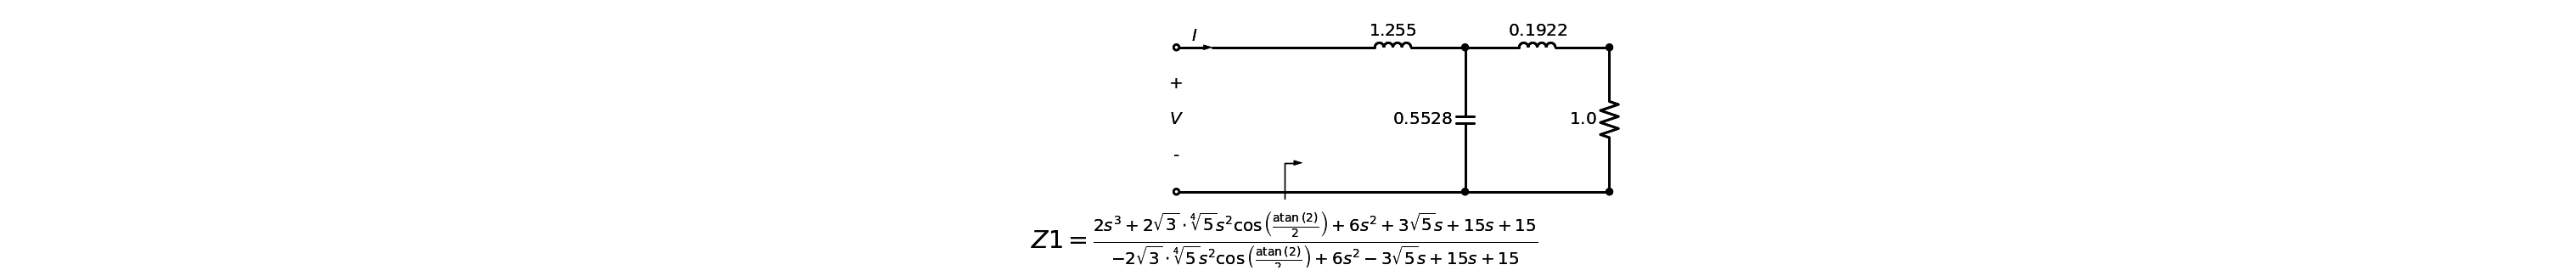

In [92]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')
d, z1_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z1',  
                                          z1, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Inductor, N(L1,4))

d = dibujar_elemento_derivacion(d, Capacitor, N(C1,4))

d = dibujar_elemento_serie(d, Inductor, N(L2,4))

d = dibujar_elemento_derivacion(d, Resistor, N(R1,4))

display(d)

<a name="3">
   <h3> 3) Simule el comportamiento de la red en LTspice graficando S21 y S11 en función de la frecuencia. </h3>
</a>

Simulación de S21: Transferencia directa de potencia

<img src="./rsc/sim/s21.png" align="center" width="1288" height="602" /> 


Simulación de S11: Coefciente de reflexión a la entrada

<img src="./rsc/sim/s11.png" align="center" width="1288" height="602" /> 


<a name="4">
   <h3> 4) Explique el comportamiento de A</h3>
</a>

1) Centro de la banda de paso:
\begin{equation}
S_{11}(s\rightarrow \infty) = 1 
\end{equation}
Desadaptación completa y reflexión total de la potencia.

2) Frecuencia de corte
\begin{equation}
S_{11}(s\rightarrow fc) = 10^{\frac{-3dB}{20}} = 0.707
\end{equation}
Solo el 30% de la potencia se transmite a la salida.

3) Transición:
A medida que la frecuencia disminuye s11 también lo hace, por lo tanto menor cantidad de potencia se refleja a la entrada para transmitirse hacia la salida. 
4) Centro de la banda detenida:
\begin{equation}
S_{11}(s\rightarrow 0) = 0 
\end{equation}
Adaptación completa y transmisión total de potencia hacia la salida (carga real a la entrada y a la salida del circuito).

<a name="5">
   <h3> 5) Modifique el circuito para que la frecuencia de corte sea 2 π 10⁶ rad/s y la resistencia del generador sea 50Ω.</h3>
</a>

Debemos desnormalizar en frecuencia y a nivel de impedancia:

\begin{equation}
\Omega_z = 50 
\end{equation}

\begin{equation}
\Omega_\omega = \frac{2\pi 10⁶ Hz}{2\pi* 0.280805 Hz} = 3561190.149748046
\end{equation}

In [151]:
omega = 3561190.149748046
omega_z = 50
_L1 = L1*(omega_z/omega)
_C1 = C1/(omega*omega_z)
_L2 = L2*(omega_z/omega)
_R1 = R1*omega_z

print('L1 desnormalizado = {} H\n'
      'C1 desnormalizado = {} F\n'
      'L2 desnormalizado = {} H\n'
      'R1 desnormalizado = {} Ohm\n'.format(N(_L1), N(_C1), N(_L2), N(_R1)))

L1 desnormalizado = 0.0000176208545335616 H
C1 desnormalizado = 3.10450372631269E-9 F
L2 desnormalizado = 0.00000269838615065673 H
R1 desnormalizado = 50.0000000000000 Ohm



Verificación de frecuencia de corte en 1MHz:

<img src="./rsc/sim/desnorm.png" align="center" width="1288" height="602" /> 


Verificación de fase lineal y retardo de grupo constante:
<img src="./rsc/sim/retardoDeGrupo.png" align="center" width="1288" height="602" /> 


------------------------